k= 1
Validation accuracy:  0.895
Testing accuracy:  0.874
k= 2
Validation accuracy:  0.9225
Testing accuracy:  0.9
k= 3
Validation accuracy:  0.9075
Testing accuracy:  0.889
k= 4
Validation accuracy:  0.9125
Testing accuracy:  0.9
k= 5
Validation accuracy:  0.9225
Testing accuracy:  0.898
k= 6
Validation accuracy:  0.92
Testing accuracy:  0.905
k= 7
Validation accuracy:  0.9175
Testing accuracy:  0.902
k= 8
Validation accuracy:  0.92
Testing accuracy:  0.906
k= 9
Validation accuracy:  0.9225
Testing accuracy:  0.907
k= 10
Validation accuracy:  0.92
Testing accuracy:  0.909
k= 11
Validation accuracy:  0.9175
Testing accuracy:  0.908
k= 12
Validation accuracy:  0.92
Testing accuracy:  0.906
k= 13
Validation accuracy:  0.92
Testing accuracy:  0.907
k= 14
Validation accuracy:  0.92
Testing accuracy:  0.907
k= 15
Validation accuracy:  0.925
Testing accuracy:  0.909
k= 16
Validation accuracy:  0.9175
Testing accuracy:  0.905
k= 17
Validation accuracy:  0.915
Testing accuracy:  0.907
k= 18
Va

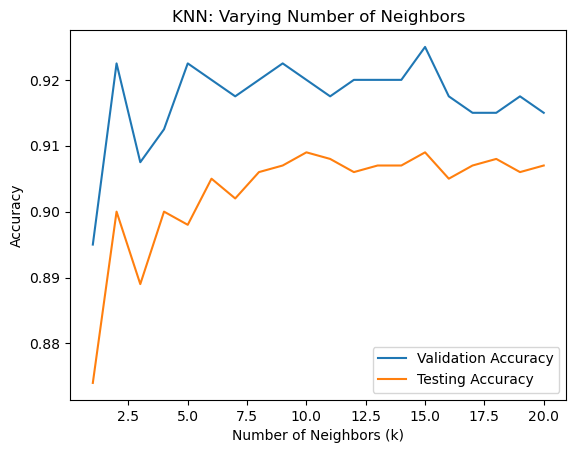

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

training= pd.read_csv("FinalTrain_set.csv", usecols= ['NO2', 'CO', 'Proximity_to_Industrial_Areas', 'Air Quality'])
train_array= training[['NO2', 'CO', 'Proximity_to_Industrial_Areas']].to_numpy()
category_array= training['Air Quality'].to_numpy()
#Load validating data
validating= pd.read_csv("FinalVal_set.csv", usecols= ['NO2', 'CO', 'Proximity_to_Industrial_Areas', 'Air Quality'])
validating_array= validating[['NO2', 'CO', 'Proximity_to_Industrial_Areas']].to_numpy()
valcat_array= validating['Air Quality'].to_numpy()
#Load testing data
testing= pd.read_csv("FinalTest_set.csv", usecols= ['NO2', 'CO', 'Proximity_to_Industrial_Areas', 'Air Quality'])
test_array= testing[['NO2', 'CO', 'Proximity_to_Industrial_Areas']].to_numpy()
testcat_array= testing['Air Quality'].to_numpy()
# Minkowski distance function (p=3)
def minkowski_distance(x, y):
    p=3
    sum=0
    for i in range(len(x)):
        sum += abs(x[i] - y[i])**p
    return sum ** (1 / p)

# K-Nearest Neighbors (KNN) function
def KNN(trainSet, trainLabels, point, k):
    distances = []
    # Calculate distances between the point and all training data
    for i in range(len(trainSet)):
        dist = minkowski_distance(trainSet[i], point)
        #add distances to the list
        distances.append((dist, trainLabels[i]))
    # Sort distances in ascending order and select top k
    distances.sort()
    top_k_distances = distances[1:k+1]
    # Count occurrences of each category in the top k
    counts = {'Good': 0, 'Moderate': 0, 'Poor': 0, 'Hazardous': 0}
    # donot need distance value in the loop so use _ to ignore
    for _, category in top_k_distances:
        counts[category] += 1
    # Determine the category with the highest count
    #use key= counts.get to retrieve the value for a given key
    return max(counts, key=counts.get)
# Predict function for validation or testing set based on training set
def predict(valSet, trainSet, trainLabels, k):
    val_pred = []
    for i in range(len(valSet)):
        pred = KNN(trainSet, trainLabels, valSet[i], k)
        val_pred.append(pred)
    return val_pred
    
# Scale the features for better performance
scaler= StandardScaler()
s_train_scaled= scaler.fit_transform(train_array)
s_test_scaled= scaler.fit_transform(test_array)
s_val_scaled= scaler.fit_transform(validating_array)
# Perform prediction on the validation and test sets
ks = np.arange(1,21)

accuracy_val={}
accuracy_test={}
for k in ks:
    val_pred = predict(s_val_scaled, s_train_scaled, category_array, k)
    test_pred = predict(s_test_scaled, s_train_scaled, category_array, k)
    print("k=",k)
    # Calculate accuracy of validation set
    accuracy_val[k] = accuracy_score(valcat_array, val_pred)
    print("Validation accuracy: ", accuracy_val[k])
    # Calculate accuracy of test set
    accuracy_test[k] = accuracy_score(testcat_array, test_pred)
    print("Testing accuracy: ", accuracy_test[k])
# Add a title
plt.title("KNN: Varying Number of Neighbors")
# Plot validation accuracies
plt.plot(ks, accuracy_val.values(), label="Validation Accuracy")
# Plot test accuracies
plt.plot(ks, accuracy_test.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
# Display the plot
plt.show()